In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import shmlast
from shmlast.last import MafParser
from shmlast import hits
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload

/Users/camille/anaconda/envs/py3-bio/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
plt.style.use('seaborn-ticks')
mpl.rc('figure', figsize=(10,10))

In [29]:
reload(shmlast.crbl)

/Users/camille/anaconda/envs/py3-bio/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'shmlast.crbl' from '/Users/camille/w/shmlast/shmlast/crbl.py'>

In [30]:
from shmlast.crbl import CRBL

In [8]:
tst_query_df = MafParser('data/Montastraea_cavernosa.trans.fa.renamed.pep.x.braFlo.pep.all.fa.maf', aln_strings=True).read()
tst_db_df = MafParser('data/braFlo.pep.all.fa.x.Montastraea_cavernosa.trans.fa.renamed.pep.maf', aln_strings=True).read()

In [28]:
def crbl(query_fn, database_fn):
    rbh_df, query_df, db_df = CRBL.get_reciprocals(query_fn, database_fn, hits.BestHits(comparison_cols=['E', 'EG2']))
    model_df = CRBL.fit_crbh_model(rbh_df)
    filtered_df = CRBL.filter_from_model(model_df, rbh_df, query_df)
    CRBL.plot_crbl_fit(model_df, rbh_df, query_df, 'plot.pdf', show=True)
    return filtered_df

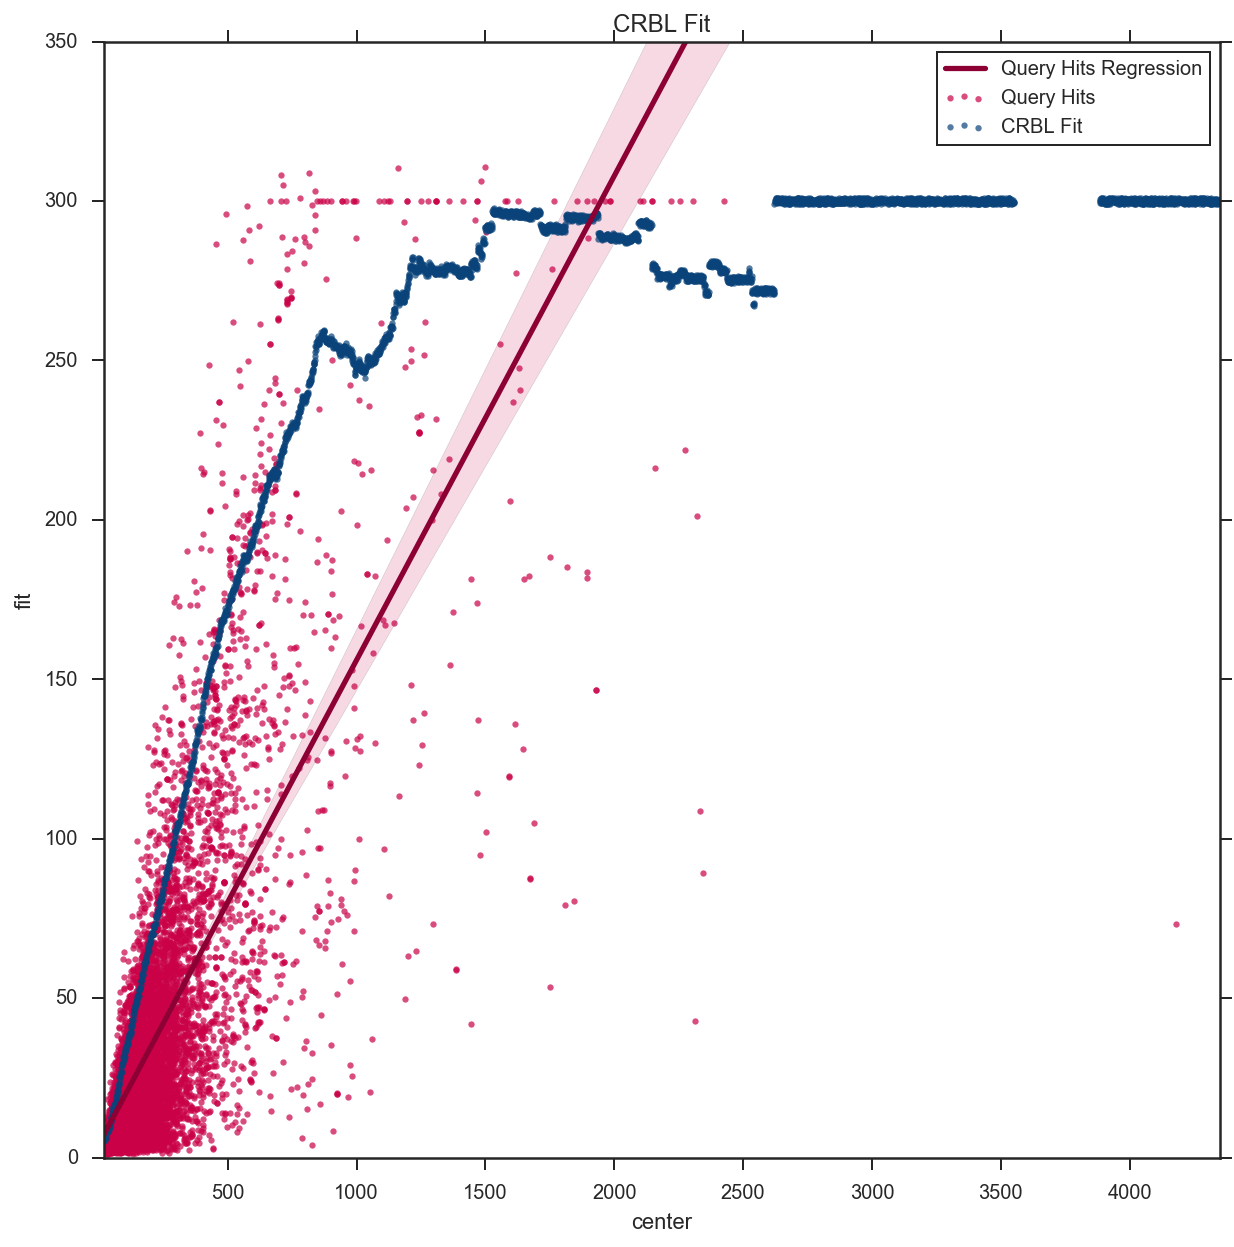

In [33]:
crbl_df = crbl('data/Montastraea_cavernosa.trans.fa.renamed.pep.x.braFlo.pep.all.fa.maf',
               'data/braFlo.pep.all.fa.x.Montastraea_cavernosa.trans.fa.renamed.pep.maf')

### Notes

* Distance between matrices -- Mantel test

In [4]:
results = pd.read_csv('data/sacPom.cdna.fa.x.pep.fa.crbl.csv')

In [6]:
results.head()

,E,EG2,E_s,ID,bitscore,q_aln_len,q_frame,q_len,q_name,q_start,q_strand,s_aln_len,s_len,s_name,s_start,s_strand,score
0,0.000000e+00,0.000000e+00,NaN,0,4377.714719,1887,1,1888,tr0,0,+,1887,1887,db0,0,+,9911.0
1,2.300000e-215,3.300000e-184,NaN,4,669.316355,278,3,403,tr1,124,+,278,278,db1,0,+,1509.0
2,1.700000e-101,2.000000e-84,NaN,54,337.846804,146,2,326,tr10,65,+,146,146,db10,0,+,758.0
3,0.000000e+00,0.000000e+00,NaN,565,2035.359313,885,3,950,tr100,14,+,885,885,db100,0,+,4604.0
4,5.500000e-226,1.700000e-199,NaN,4571,720.074010,307,2,613,tr1000,231,+,307,307,db1000,0,+,1624.0


In [7]:
q_names = pd.read_csv('data/sacPom.cdna.fa.names.csv')

In [8]:
d_names = pd.read_csv('data/pep.fa.names.csv')

In [12]:
results = pd.merge(results, q_names, left_on='q_name', right_on='new_name', )

In [13]:
results['q_name'] = results['old_name']

In [15]:
del results['old_name']

In [17]:
results = pd.merge(results, d_names, left_on='s_name', right_on='new_name', )

In [18]:
results['s_name'] = results['old_name']
del results['old_name']

In [19]:
results

,E,EG2,E_s,ID,bitscore,q_aln_len,q_frame,q_len,q_name,q_start,q_strand,s_aln_len,s_len,s_name,s_start,s_strand,score,new_name_x,new_name_y
0,0.000000e+00,0.000000e+00,NaN,0,4377.714719,1887,1,1888,SPAC212.11|1|5662|-1|tlh1|I|protein_coding|Rec...,0,+,1887,1887,SPAC212.11|tlh1|I|RecQ type DNA helicase,0,+,9911.0,tr0,db0
1,0.000000e+00,0.000000e+00,300.000000,18914,4377.714719,1887,1,2005,SPBCPT2R1.08c|4526885|4532899|1|tlh2|II|protei...,0,+,1887,1887,SPAC212.11|tlh1|I|RecQ type DNA helicase,0,+,9911.0,tr4205,db0
2,0.000000e+00,0.000000e+00,300.000000,1,4377.714719,1887,1,1888,SPAC212.11|1|5662|-1|tlh1|I|protein_coding|Rec...,0,+,1887,1919,SPBCPT2R1.08c|tlh2|II|RecQ type DNA helicase Tlh1,0,+,9911.0,tr0,db4204
3,0.000000e+00,0.000000e+00,NaN,18913,4450.982289,1919,1,2005,SPBCPT2R1.08c|4526885|4532899|1|tlh2|II|protei...,0,+,1919,1919,SPBCPT2R1.08c|tlh2|II|RecQ type DNA helicase Tlh1,0,+,10077.0,tr4205,db4204
4,2.300000e-215,3.300000e-184,NaN,4,669.316355,278,3,403,SPAC212.08c|11784|12994|1|SPAC212.08c|I|protei...,124,+,278,278,SPAC212.08c|SPAC212.08c|I|S. pombe specific GP...,0,+,1509.0,tr1,db1
5,1.700000e-101,2.000000e-84,NaN,54,337.846804,146,2,326,SPAC977.02|32034|33012|1|SPAC977.02|I|protein_...,65,+,146,146,SPAC977.02|SPAC977.02|I|S. pombe specific 5Tm ...,0,+,758.0,tr10,db10
6,4.200000e-103,6.700000e-84,102.376751,10530,336.081320,146,1,261,SPBC1348.03|10569|11351|1|SPBC1348.03|II|prote...,0,+,146,146,SPAC977.02|SPAC977.02|I|S. pombe specific 5Tm ...,0,+,754.0,tr2339,db10
7,3.400000e-107,6.700000e-84,106.468521,18868,336.081320,146,1,147,SPBPB2B2.17c|4501956|4502396|-1|SPBPB2B2.17c|I...,0,+,146,146,SPAC977.02|SPAC977.02|I|S. pombe specific 5Tm ...,0,+,754.0,tr4198,db10
8,7.400000e-108,2.000000e-84,107.130768,10471,337.846804,146,1,147,SPAC750.04c|5564211|5564651|-1|SPAC750.04c|I|p...,0,+,146,146,SPAC977.02|SPAC977.02|I|S. pombe specific 5Tm ...,0,+,758.0,tr2331,db10
9,0.000000e+00,0.000000e+00,NaN,565,2035.359313,885,3,950,SPAC1639.02c|255881|259505|-1|trk2|I|protein_c...,14,+,885,885,SPAC1639.02c|trk2|I|potassium ion transmembran...,0,+,4604.0,tr100,db100
